# https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [305]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [306]:
dataset = pd.read_csv('Dataset_.csv')
dataset = dataset.drop(columns=['Day', 'Type'])
#x = RobustScaler().fit_transform(df)
x = StandardScaler().fit_transform(dataset)
#x = MinMaxScaler().fit_transform(df)
i=0
DF = pd.DataFrame()
for column in dataset.columns:
    series = pd.Series(x[:,i])
    DF.insert(i,column,series)
    i+=1
series = pd.Series(np.ones(61))
series[4:8] = 0
DF.insert(len(DF.columns),'class',series)
print(DF)

          F0        Fj        Fm        FI   F300mks    F50mks     t(Fm)  \
0   0.262939  0.104620  1.678068  1.300215  0.261811  0.382466  0.411486   
1  -0.098103  0.326437  1.268537  0.856298  0.083020  0.045723 -0.027775   
2   0.172679  0.331058  1.019256  1.057118  0.109839  0.031082  1.321383   
3   0.019236  0.391133  1.105317  1.064164  0.570225  0.309261  0.474237   
4   0.885736  0.811659 -1.844498 -1.641614  0.780305  1.253606 -1.157303   
..       ...       ...       ...       ...       ...       ...       ...   
56 -0.332780 -0.052500  0.844167  0.722419 -0.203045 -0.312981  0.317358   
57  0.416382  1.440139  0.482117  0.831636  0.972505  0.419069 -0.718042   
58 -0.224467  0.589843  0.241740  0.426474  1.106598 -0.210494 -0.247406   
59 -0.639665 -0.801129  0.535534  0.260886 -0.891389 -0.730250  0.317358   
60  0.443460  1.259913  0.318898  0.669571  0.976975  0.433710 -0.655291   

          Vj        VI  phi P0 (Fv/Fm)  ...    DI0/RC    ET0/RC    RE0/RC  \
0  -1.1377

In [307]:
x = DF.iloc[:, :-1].values
x_outliers = np.array(x[4:8])
x_inliers = np.concatenate((x[0:4],x[8:61]),axis=0)
print(len(x_inliers))
y = DF.iloc[:, len(dataset.columns)].values
y_outliers = np.array(y[4:8])
y_inliers = np.concatenate((y[0:4],y[8:61]),axis=0)
print(len(y_inliers))

57
57


In [308]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_inliers, y_inliers, test_size=0.20)
i = 2
x_train = np.concatenate((x_train, x_outliers[0:i]),axis=0)
x_test = np.concatenate((x_test, x_outliers[i:4]),axis=0)
y_train = np.concatenate((y_train, y_outliers[0:i]),axis=0)
y_test = np.concatenate((y_test, y_outliers[i:4]),axis=0)
print(y_test)
print(len(x_test))
print(len(y_train))
print(len(x_train))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
14
47
47


In [309]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train)

#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)

In [310]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [311]:
y_pred = classifier.predict(x_test)
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]


In [312]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(y_pred)

[[ 2  0]
 [ 0 12]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



Text(0, 0.5, 'PCA 2')

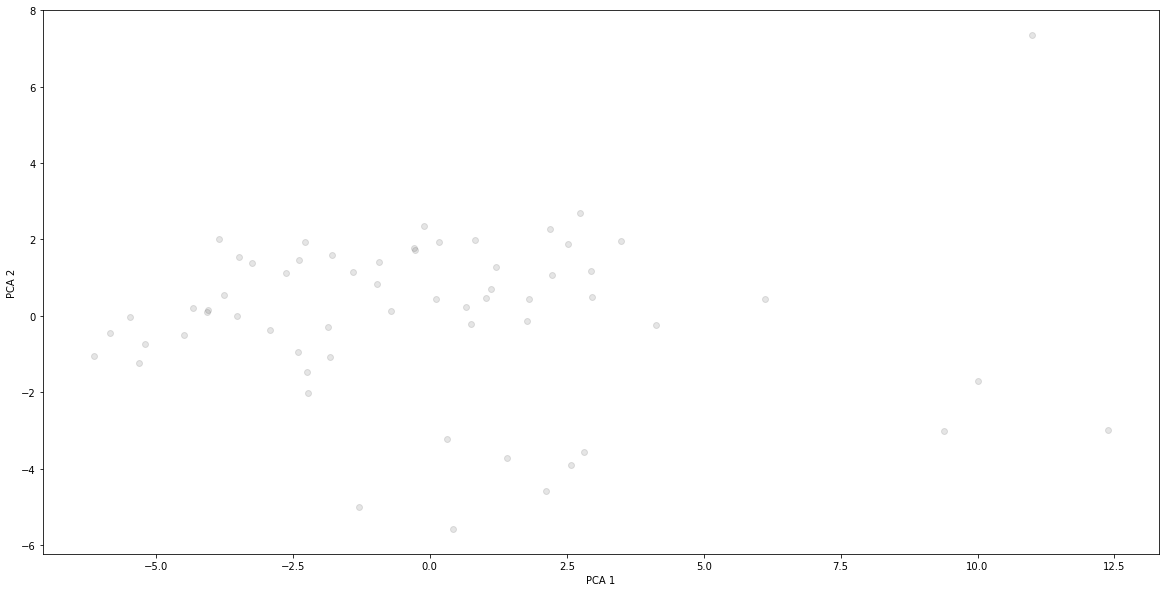

In [313]:
x_pca = np.concatenate((x_test, x_train), axis=0)
y_pca = np.concatenate((y_pred, y_train), axis=0)
i=0
df_pca = pd.DataFrame()
for column in dataset.columns:
    series = pd.Series(x_pca[:,i])
    df_pca.insert(i,column,series)
    i+=1
series_y_pca = pd.Series(y_pca)
df_pca.insert(len(df_pca.columns),'class',series)
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(df_pca)
PCA_components = pd.DataFrame(principalComponents)
plt.figure(figsize=(20,10))
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 2')

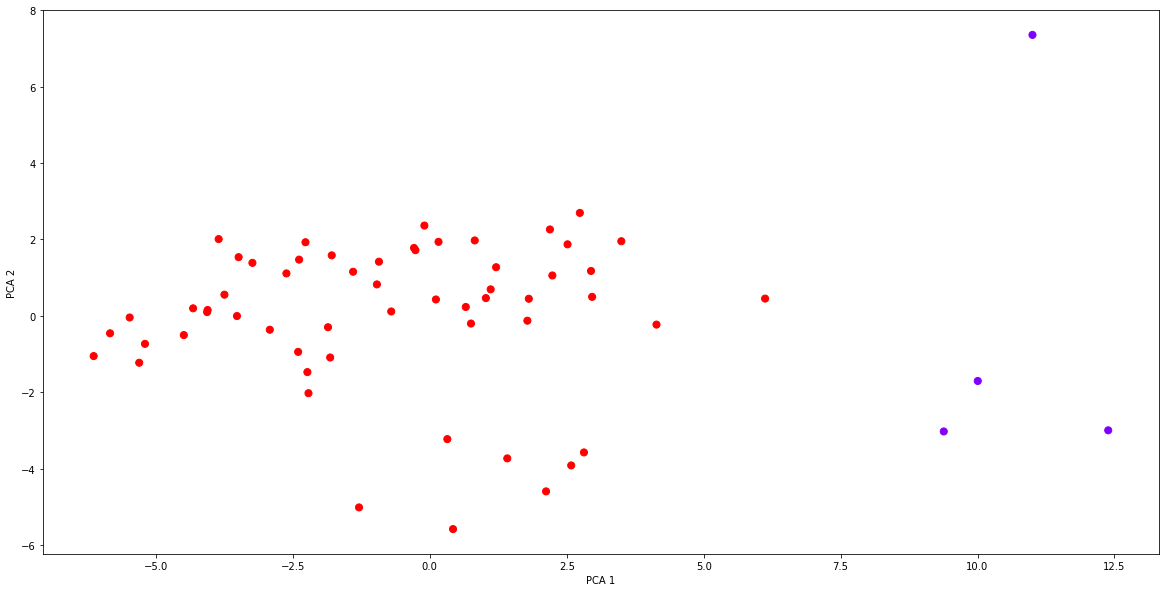

In [314]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(PCA_components[0], PCA_components[1], c=y_pca, cmap='rainbow',s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')